**Exploratory Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
train_data = pd.read_csv('option_train.csv', index_col=0)

In [ ]:
test_data = pd.read_csv('option_test_nolabel.csv', index_col=0)

In [ ]:
train_data

,Value,S,K,tau,r,BS
1,348.500,1394.46,1050,0.128767,0.0116,Under
2,149.375,1432.25,1400,0.679452,0.0113,Under
3,294.500,1478.90,1225,0.443836,0.0112,Under
4,3.375,1369.89,1500,0.117808,0.0119,Over
5,84.000,1366.42,1350,0.298630,0.0119,Under
...,...,...,...,...,...,...
4996,325.250,1465.15,1175,0.424658,0.0111,Under
4997,36.000,1480.87,1480,0.101370,0.0111,Over
4998,90.000,1356.56,1500,0.673973,0.0120,Under
4999,175.875,1333.36,1200,0.309589,0.0122,Under


In [ ]:
test_data

,S,K,tau,r
1,1409.28,1325,0.126027,0.0115
2,1505.97,1100,0.315068,0.0110
3,1409.57,1450,0.197260,0.0116
4,1407.81,1250,0.101370,0.0116
5,1494.50,1300,0.194521,0.0110
...,...,...,...,...
496,1514.09,1200,0.301370,0.0109
497,1359.15,1500,0.260274,0.0119
498,1396.93,1410,0.156164,0.0117
499,1436.51,1475,0.463014,0.0114


In [ ]:
train_data.dtypes

Value    float64
S        float64
K          int64
tau      float64
r        float64
BS        object
dtype: object

In [ ]:
train_data.isnull().sum()

Value    0
S        0
K        0
tau      0
r        0
BS       0
dtype: int64

In [ ]:
train_data.describe()

,Value,S,K,tau,r
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,140.316869,1426.643916,1370.244000,0.327615,0.011468
std,125.155000,56.051523,172.679107,0.231184,0.000448
min,0.281250,1264.740000,750.000000,0.084932,0.010600
25%,45.750000,1387.670000,1275.000000,0.142466,0.011100
50%,105.125000,1434.320000,1400.000000,0.238356,0.011400
75%,200.406250,1469.440000,1475.000000,0.463014,0.011700
max,685.500000,1527.460000,1995.000000,0.989041,0.012900


In [ ]:
train_data['Over'] = np.where(train_data['BS'] == 'Over', 1, 0)

In [ ]:
train_data.head()

,Value,S,K,tau,r,BS,Over
1,348.500,1394.46,1050,0.128767,0.0116,Under,0
2,149.375,1432.25,1400,0.679452,0.0113,Under,0
3,294.500,1478.90,1225,0.443836,0.0112,Under,0
4,3.375,1369.89,1500,0.117808,0.0119,Over,1
5,84.000,1366.42,1350,0.298630,0.0119,Under,0


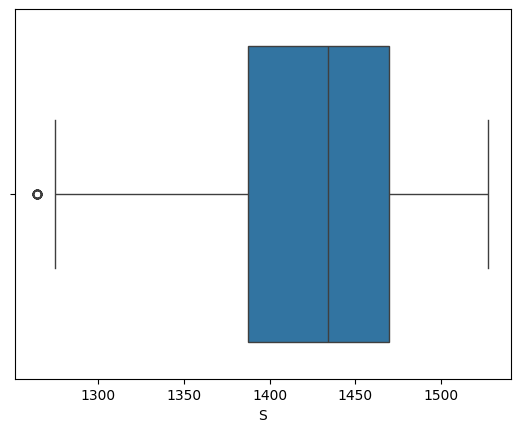

In [ ]:
# Box plot for S
sns.boxplot(x=train_data['S'])
plt.show()

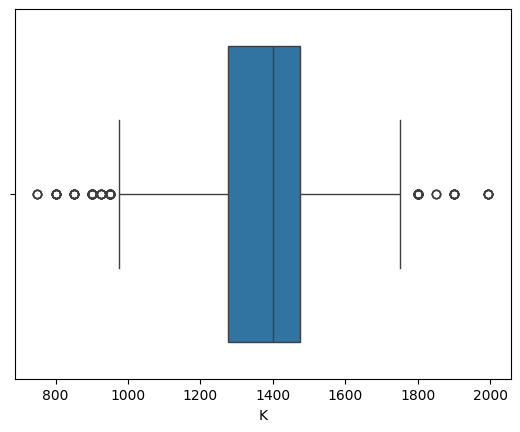

In [ ]:
# Box plot for K
sns.boxplot(x=train_data['K'])
plt.show()

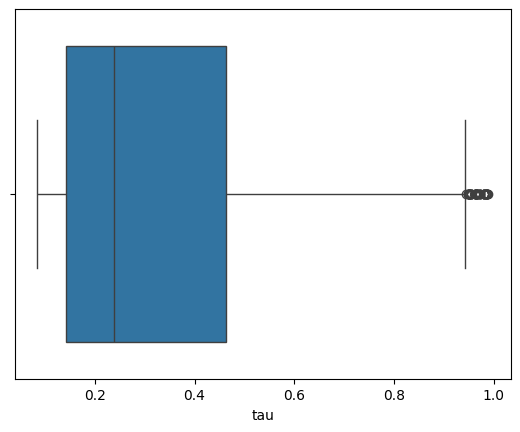

In [ ]:
# Box plot for tau
sns.boxplot(x=train_data['tau'])
plt.show()

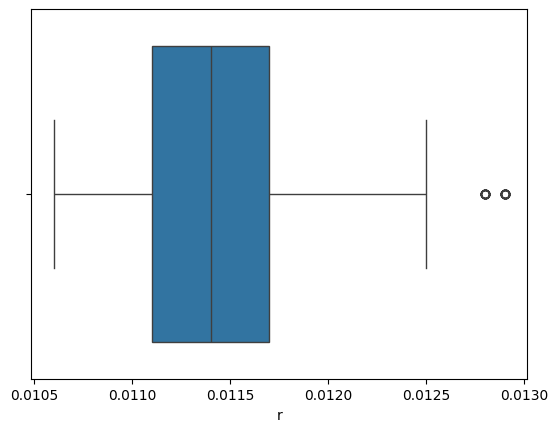

In [ ]:
# Box plot for r
sns.boxplot(x=train_data['r'])
plt.show()

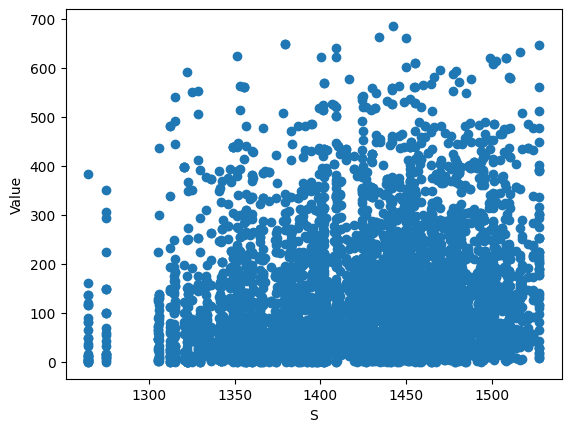

In [ ]:
# Scatter plot for S
plt.scatter(train_data['S'], train_data['Value'])
plt.xlabel('S')
plt.ylabel('Value')
plt.show()

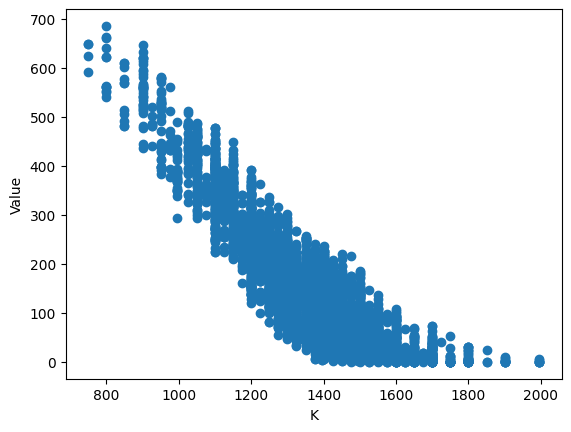

In [ ]:
# Scatter plot for K
plt.scatter(train_data['K'], train_data['Value'])
plt.xlabel('K')
plt.ylabel('Value')
plt.show()

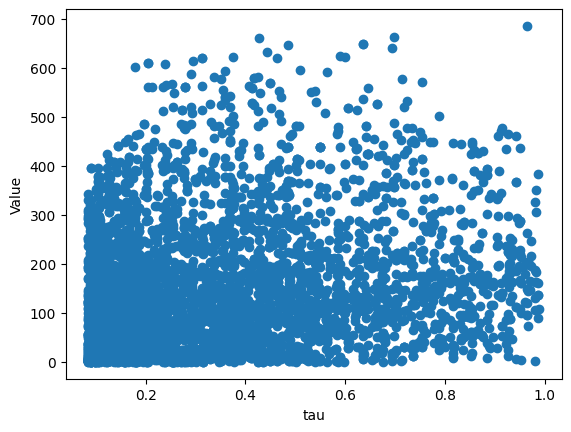

In [ ]:
# Scatter plot for tau
plt.scatter(train_data['tau'], train_data['Value'])
plt.xlabel('tau')
plt.ylabel('Value')
plt.show()

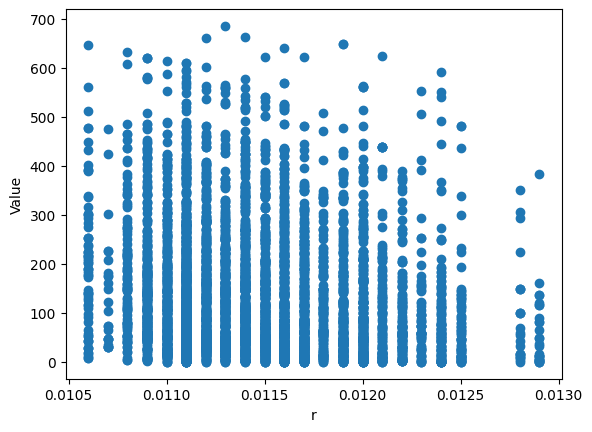

In [ ]:
# Scatter plot for r
plt.scatter(train_data['r'], train_data['Value'])
plt.xlabel('r')
plt.ylabel('Value')
plt.show()

In [ ]:
# Filter outlier for S
SQ1 = train_data['S'].quantile(0.25)
SQ3 = train_data['S'].quantile(0.75)
SIQR = SQ3 - SQ1
outlier_condition = (train_data['S'] < (SQ1 - 3 * SIQR)) | (train_data['S']> (SQ3 + 3 * SIQR))

SQ3

1469.44

In [ ]:
train_data_filtered = train_data[~outlier_condition]

In [ ]:
train_data_filtered

,Value,S,K,tau,r,BS,Over
1,348.500,1394.46,1050,0.128767,0.0116,Under,0
2,149.375,1432.25,1400,0.679452,0.0113,Under,0
3,294.500,1478.90,1225,0.443836,0.0112,Under,0
4,3.375,1369.89,1500,0.117808,0.0119,Over,1
5,84.000,1366.42,1350,0.298630,0.0119,Under,0
...,...,...,...,...,...,...,...
4996,325.250,1465.15,1175,0.424658,0.0111,Under,0
4997,36.000,1480.87,1480,0.101370,0.0111,Over,1
4998,90.000,1356.56,1500,0.673973,0.0120,Under,0
4999,175.875,1333.36,1200,0.309589,0.0122,Under,0


In [ ]:
# correlation matrix
corr_matrix = train_data_filtered.drop('BS', axis=1).corr()
corr_matrix

,Value,S,K,tau,r,Over
Value,1.000000,0.148884,-0.880802,0.255343,-0.163317,-0.486149
S,0.148884,1.000000,0.128228,-0.020299,-0.983740,0.061290
K,-0.880802,0.128228,1.000000,0.022948,-0.111107,0.537382
tau,0.255343,-0.020299,0.022948,1.000000,0.010245,-0.172979
r,-0.163317,-0.983740,-0.111107,0.010245,1.000000,-0.046926
Over,-0.486149,0.061290,0.537382,-0.172979,-0.046926,1.000000


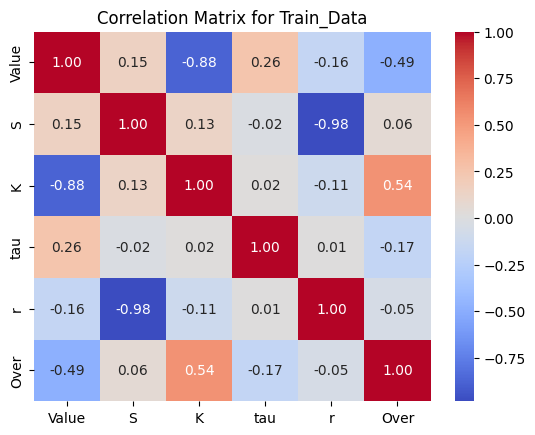

In [ ]:
# heatmap for correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Train_Data')
plt.show()

**Cross Validation for Linear Regression**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
kfolds_regresssion = KFold(n_splits = 10, random_state = 0, shuffle = True)
linear_regresssion_model = LinearRegression()

In [ ]:
r2_model_1_cv = cross_val_score(linear_regresssion_model, train_data[['S','K','tau','r']], train_data['Value'], cv=kfolds_regresssion)

print("Linear Regression: \n")
print("r squared of 10-folds:",r2_model_1_cv,"(mean r squared:",np.mean(r2_model_1_cv),")")

Linear Regression: 

r squared of 10-folds: [0.91778548 0.92251261 0.93828949 0.92424916 0.92617908 0.91753753
 0.93900446 0.91267521 0.91717563 0.92625406] (mean r squared: 0.9241662722977286 )


In [ ]:
neg_mse_model_1_cv = cross_val_score(linear_regresssion_model, train_data[['S','K','tau','r']], train_data['Value'],cv=kfolds_regresssion,scoring = 'neg_mean_squared_error')

print("Linear Regression: \n")
print("mean_squared_error of 10-folds:",-neg_mse_model_1_cv,"(mean MSE:",-np.mean(neg_mse_model_1_cv),")")

Linear Regression: 

mean_squared_error of 10-folds: [1145.82301356 1165.94301816 1011.43221788 1345.25354726 1120.19846866
 1319.25573741 1090.91046687 1327.31698885 1271.48561739  994.8002454 ] (mean MSE: 1179.2419321454786 )


**Cross Validation for KNN Regression**


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [ ]:
r2_model_4_cv = cross_val_score(knn_regressor, train_data[['S','K','tau','r']], train_data['Value'], cv=kfolds_regresssion)

print("KNN Regression: \n")
print("r squared of 10-folds:",r2_model_4_cv,"(mean r squared:",np.mean(r2_model_4_cv),")")

KNN Regression: 

r squared of 10-folds: [0.9425639  0.93913343 0.94337626 0.96010063 0.94526219 0.95110753
 0.96141654 0.94884171 0.95569633 0.9359026 ] (mean r squared: 0.9483401124016722 )


In [ ]:
neg_mse_model_4_cv = cross_val_score(knn_regressor, train_data[['S','K','tau','r']], train_data['Value'],cv=kfolds_regresssion,scoring = 'neg_mean_squared_error')

print("KNN Regression: \n")
print("mean_squared_error of 10-folds:",-neg_mse_model_4_cv,"(mean MSE:",-np.mean(neg_mse_model_4_cv),")")

KNN Regression: 

mean_squared_error of 10-folds: [800.48638109 915.85164789 928.06044391 708.57001188 830.62108172
 782.19425445 690.06841523 777.59438055 680.13170813 864.64565367] (mean MSE: 797.8223978515625 )


**Cross Validation for Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
## standardize the data
from sklearn.preprocessing import StandardScaler

columns_to_scale = train_data.drop('BS', axis=1).columns
stdsc = StandardScaler()
train_data_std = stdsc.fit_transform(train_data.drop('BS', axis=1))
train_data_std_df = pd.DataFrame(train_data_std, columns=columns_to_scale)
X_train_std = train_data_std_df[['S','K','tau','r']]
y_train = train_data['Value']

In [ ]:
##tuning alpha
alphas = 10**np.linspace(10,-2,100)*0.5

In [ ]:
ridgecv = RidgeCV(alphas=alphas, scoring='r2', cv=kfolds_regresssion)
ridgecv.fit(X_train_std, y_train)
ridgecv.alpha_

4.055654153948428

In [ ]:
ridge = Ridge(alpha=ridgecv.alpha_)

In [ ]:
r2_model_5_cv = cross_val_score(ridge, X_train_std, train_data['Value'], cv=kfolds_regresssion)

print("Ridge Regression: \n")
print("r squared of 10-folds:",r2_model_5_cv,"(mean r squared:",np.mean(r2_model_5_cv),")")

Ridge Regression: 

r squared of 10-folds: [0.91791835 0.92248389 0.93821575 0.92424968 0.9261862  0.91753161
 0.93891333 0.91271755 0.9171937  0.926286  ] (mean r squared: 0.9241696064137036 )


**Cross Validation for Lasso**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=ridgecv.alpha_)

In [ ]:
r2_model_8_cv = cross_val_score(lasso, X_train_std, train_data['Value'], cv=kfolds_regresssion)

print("Lasso Regression: \n")
print("r squared of 10-folds:",r2_model_8_cv,"(mean r squared:",np.mean(r2_model_8_cv),")")

Lasso Regression: 

r squared of 10-folds: [0.91692337 0.91801308 0.93372564 0.91830759 0.92142289 0.91336784
 0.93413911 0.91252059 0.91552891 0.92267122] (mean r squared: 0.9206620240140324 )


**Cross Validation for Decision Tree**

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [ ]:
X_train = train_data[['S','K','tau','r']]

In [ ]:
# Assuming X and y are your feature matrix and target vector
# Initialize the decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=0)

# Fit the decision tree regressor to the training data
tree_reg.fit(X_train, y_train)

# Calculate the cost-complexity pruning path
path = tree_reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [ ]:
len(ccp_alphas)

##Having 3683 values suggests our decision tree might be overfitting the training data, hence, we chose to use the default value for ccp_alpha (no pruning) for our decision tree regression model.

3683

In [ ]:
decisiontree_regressor = DecisionTreeRegressor(random_state=0)
r2_model_6_cv = cross_val_score(decisiontree_regressor, train_data[['S','K','tau','r']], train_data['Value'], cv=kfolds_regresssion)

print("Decision Tree Regression: \n")
print("r squared of 10-folds:",r2_model_6_cv,"(mean r squared:",np.mean(r2_model_6_cv),")")

Decision Tree Regression: 

r squared of 10-folds: [0.99432973 0.99209483 0.9908432  0.9915095  0.99366586 0.99381148
 0.99367596 0.9942623  0.99461532 0.99195008] (mean r squared: 0.9930758259176281 )


In [ ]:
neg_mse_model_6_cv = cross_val_score(decisiontree_regressor, train_data[['S','K','tau','r']], train_data['Value'],cv=kfolds_regresssion,scoring = 'neg_mean_squared_error')

print("Decision Tree Regression: \n")
print("mean_squared_error of 10-folds:",-neg_mse_model_6_cv,"(mean MSE:",-np.mean(neg_mse_model_6_cv),")")

Decision Tree Regression: 

mean_squared_error of 10-folds: [ 79.02642969 118.94803906 150.07958008 150.7821875   96.11773633
  99.00557422 113.10593945  87.2117832   82.66332422 108.58989258] (mean MSE: 108.5530486328125 )


**Cross Validation for Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
randomforest_regressor = RandomForestRegressor(n_estimators=100, random_state= 0, max_features = 3)
r2_model_7_cv = cross_val_score(randomforest_regressor, train_data[['S','K','tau','r']], train_data['Value'], cv=kfolds_regresssion)

print("Random Forest Regression: \n")
print("r squared of 10-folds:",r2_model_7_cv,"(mean r squared:",np.mean(r2_model_7_cv),")")

Random Forest Regression: 

r squared of 10-folds: [0.99683486 0.99615675 0.99661312 0.99730976 0.9964027  0.99738839
 0.99747235 0.99720729 0.99710974 0.99698279] (mean r squared: 0.9969477753117477 )


In [ ]:
neg_mse_model_7_cv = cross_val_score(randomforest_regressor, train_data[['S','K','tau','r']], train_data['Value'],cv=kfolds_regresssion,scoring = 'neg_mean_squared_error')

print("Random Forest Regression: \n")
print("mean_squared_error of 10-folds:",-neg_mse_model_7_cv,"(mean MSE:",-np.mean(neg_mse_model_7_cv),")")

Random Forest Regression: 

mean_squared_error of 10-folds: [44.11255224 57.82884866 55.51082589 47.77572739 54.58738459 41.7812462
 45.20719666 42.4486057  44.3700175  40.70082917] (mean MSE: 47.43232339939453 )


In [ ]:
randomforest_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred_reg = randomforest_regressor.predict(test_data)
len(y_pred_reg)

500

**Cross Validation for Logistics Regression**

In [ ]:
from sklearn.model_selection import StratifiedKFold
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

In [ ]:
kfold_classification = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [ ]:
logistic_model = LogisticRegression (penalty=None, max_iter = 10000)

In [ ]:
error_model_1_cv = cross_val_score(logistic_model, train_data[['S','K','tau','r']], train_data['Over'], cv=kfold_classification)

print("Logistic Regression: \n")
print("accuracies of 10-folds:",error_model_1_cv, "(mean classification error:",1-np.mean(error_model_1_cv),")")

Logistic Regression: 

accuracies of 10-folds: [0.882 0.886 0.852 0.866 0.89  0.896 0.86  0.904 0.86  0.858] (mean classification error: 0.12460000000000004 )


**Cross Validation for KNN Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
error_model_2_cv = cross_val_score(knn_classifier, train_data[['S','K','tau','r']], train_data['Over'], cv=kfold_classification)

print("KNN Classification: \n")
print("accuracies of 10-folds:",error_model_2_cv, "(mean classification error:",1-np.mean(error_model_2_cv),")")

KNN Classification: 

accuracies of 10-folds: [0.842 0.878 0.856 0.86  0.85  0.892 0.85  0.868 0.842 0.852] (mean classification error: 0.14100000000000001 )


**Cross Validation for Decision Tree - Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
y_train_class = train_data['Over']

In [ ]:
tree_classifier = DecisionTreeClassifier(random_state=0)

In [ ]:
tree_classifier.fit(X_train, y_train_class)

path = tree_classifier.cost_complexity_pruning_path(X_train, y_train_class)
ccp_alphas = path.ccp_alphas

In [ ]:
len(ccp_alphas)

204

In [ ]:
accuracies = []
for ccp_alpha in ccp_alphas:
    score_for_alpha = []
    for train_index, test_index in kfold_classification.split(X_train, y_train_class):
        clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf.fit(X_train.iloc[train_index], y_train_class.iloc[train_index])
        y_pred = clf.predict(X_train.iloc[test_index])
        score = accuracy_score(y_pred, y_train_class.iloc[test_index])
        score_for_alpha.append(score)
    accuracies.append(sum(score_for_alpha)/len(score_for_alpha))

In [ ]:
print("The accuracies: ",accuracies)
print("\nThe index corresponding to the maximum of the accuracies: ", np.argmax(accuracies))

The accuracies:  [0.9208000000000001, 0.9208000000000001, 0.9206, 0.9206, 0.9218, 0.9219999999999999, 0.9219999999999999, 0.9219999999999999, 0.9221999999999998, 0.9221999999999998, 0.9221999999999998, 0.9221999999999998, 0.9221999999999998, 0.9221999999999998, 0.9221999999999998, 0.9221999999999998, 0.9221999999999998, 0.9221999999999998, 0.9227999999999998, 0.9231999999999998, 0.9236000000000001, 0.9236000000000001, 0.9236000000000001, 0.9236000000000001, 0.9236000000000001, 0.9238000000000002, 0.9238000000000002, 0.9238000000000002, 0.9238000000000002, 0.9238000000000002, 0.9238000000000002, 0.9234, 0.9234, 0.9234, 0.9234, 0.9234, 0.9234, 0.9234, 0.9234, 0.9234, 0.9234, 0.9234, 0.9234, 0.9234, 0.9234, 0.9236000000000001, 0.924, 0.9238000000000002, 0.9238000000000002, 0.9228, 0.9228, 0.9231999999999999, 0.9231999999999999, 0.9231999999999999, 0.9231999999999999, 0.9225999999999999, 0.9228, 0.9228, 0.9228, 0.9228, 0.9228, 0.9231999999999999, 0.9232000000000001, 0.9232000000000001, 0.9

In [ ]:
alpha_cv_DT = ccp_alphas[np.argmax(accuracies)]
alpha_cv_DT

0.00017777777777777776

In [ ]:
clf_tree_final = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha_cv_DT)

In [ ]:
error_model_3_cv = cross_val_score(clf_tree_final, train_data[['S','K','tau','r']], train_data['Over'], cv=kfold_classification)

print("Decision Tree Classification: \n")
print("accuracies of 10-folds:",error_model_3_cv, "(mean classification error:",1-np.mean(error_model_3_cv),")")

Decision Tree Classification: 

accuracies of 10-folds: [0.9   0.916 0.928 0.932 0.936 0.942 0.946 0.904 0.914 0.922] (mean classification error: 0.07599999999999996 )


**Cross Validation for Random Forest - Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomforest_clf = RandomForestClassifier(n_estimators=100, random_state= 0)
error_model_4_cv = cross_val_score(randomforest_clf, train_data[['S','K','tau','r']], train_data['Over'], cv=kfold_classification)

print("Random Forest Classification: \n")
print("accuracies of 10-folds:",error_model_4_cv, "(mean classification error:",1-np.mean(error_model_4_cv),")")

Random Forest Classification: 

accuracies of 10-folds: [0.924 0.936 0.948 0.938 0.938 0.948 0.954 0.91  0.928 0.944] (mean classification error: 0.06319999999999981 )


**Cross Validation for SVC**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='linear')

error_model_5_cv = cross_val_score(svc, train_data[['S','K','tau','r']], train_data['BS'], cv=kfold_classification)

print("SVC: \n")
print("accuracies of 10-folds:",error_model_5_cv, "(mean classification error:",1-np.mean(error_model_5_cv),")")

SVC: 

accuracies of 10-folds: [0.878 0.886 0.886 0.884 0.88  0.916 0.868 0.882 0.872 0.868] (mean classification error: 0.118 )


**Cross Validation for Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#normalize independent variables
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
train_data['SNorm'] = mms.fit_transform(train_data[['S']])
train_data['KNorm'] = mms.fit_transform(train_data[['K']])
train_data['tauNorm'] = mms.fit_transform(train_data[['tau']])
train_data['rNorm'] = mms.fit_transform(train_data[['r']])

In [ ]:
train_data.head()

,Value,S,K,tau,r,BS,Over,SNorm,KNorm,tauNorm,rNorm
1,348.500,1394.46,1050,0.128767,0.0116,Under,0,0.493758,0.240964,0.048485,0.434783
2,149.375,1432.25,1400,0.679452,0.0113,Under,0,0.637599,0.522088,0.657576,0.304348
3,294.500,1478.90,1225,0.443836,0.0112,Under,0,0.815164,0.381526,0.396970,0.260870
4,3.375,1369.89,1500,0.117808,0.0119,Over,1,0.400236,0.602410,0.036364,0.565217
5,84.000,1366.42,1350,0.298630,0.0119,Under,0,0.387028,0.481928,0.236364,0.565217


In [ ]:
train_data.columns.get_loc('SNorm')

7

In [ ]:
datanparray = train_data.values

In [ ]:
# Define independent variables,
TrainData   = datanparray[:, [7,8,9,10]]
# Define dependent variable
TrainLabels = datanparray[:, [6]]

In [ ]:
TrainDataFloat = TrainData.astype(float)
TrainDataFloat

array([[0.49375761, 0.24096386, 0.04848485, 0.43478261],
       [0.63759896, 0.52208835, 0.65757576, 0.30434783],
       [0.81516443, 0.3815261 , 0.3969697 , 0.26086957],
       ...,
       [0.34949756, 0.60240964, 0.65151515, 0.60869565],
       [0.26119062, 0.36144578, 0.24848485, 0.69565217],
       [0.82266291, 0.58232932, 0.46363636, 0.2173913 ]])

In [ ]:
TrainLabelsInt = TrainLabels.astype(int)
TrainLabelsInt

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
print("TrainDataFloat shape:", TrainDataFloat.shape)
print("TrainLabelsInt shape:", TrainLabelsInt.shape)
print("TrainDataFloat dtype:", TrainDataFloat.dtype)
print("TrainLabelsInt dtype:", TrainLabelsInt.dtype)

TrainDataFloat shape: (5000, 4)
TrainLabelsInt shape: (5000, 1)
TrainDataFloat dtype: float64
TrainLabelsInt dtype: int64


In [ ]:
neural_model = keras.Sequential([
    keras.layers.Dense(12, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [ ]:
neural_model.compile(
              optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
neural_model.fit(TrainDataFloat, TrainLabelsInt, epochs=20)

Epoch 1/20
157/157 [==============================] - 1s 2ms/step - loss: 0.5736 - accuracy: 0.7604
Epoch 2/20
157/157 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.7736
Epoch 3/20
157/157 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7736
Epoch 4/20
157/157 [==============================] - 1s 3ms/step - loss: 0.4258 - accuracy: 0.7760
Epoch 5/20
157/157 [==============================] - 1s 3ms/step - loss: 0.3784 - accuracy: 0.8054
Epoch 6/20
157/157 [==============================] - 0s 3ms/step - loss: 0.3349 - accuracy: 0.8418
Epoch 7/20
157/157 [==============================] - 0s 3ms/step - loss: 0.3037 - accuracy: 0.8650
Epoch 8/20
157/157 [==============================] - 1s 3ms/step - loss: 0.2849 - accuracy: 0.8734
Epoch 9/20
157/157 [==============================] - 1s 3ms/step - loss: 0.2705 - accuracy: 0.8802
Epoch 10/20
157/157 [==============================] - 0s 2ms/step - loss: 0.2635 - accuracy: 0.8826

In [ ]:
train_loss, train_acc = neural_model.evaluate(TrainDataFloat, TrainLabelsInt)

print('Train accuracy:', train_acc, 'Test error', 1-train_acc)

157/157 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.8954
Train accuracy: 0.8953999876976013 Test error 0.10460001230239868


**Cross Validation for AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100,       # Number of models to iteratively train
    algorithm="SAMME.R",   # Algorithm to use, SAMME.R is a variant of SAMME
    learning_rate=1.0      # Weight applied to each classifier at each boosting iteration
)

In [ ]:
error_model_6_cv = cross_val_score(ada_clf, train_data[['S','K','tau','r']], train_data['Over'], cv=kfold_classification)

print("AdaBoost: \n")
print("accuracies of 10-folds:",error_model_6_cv, "(mean classification error:",1-np.mean(error_model_6_cv),")")

AdaBoost: 

accuracies of 10-folds: [0.904 0.914 0.914 0.896 0.908 0.912 0.886 0.902 0.896 0.896] (mean classification error: 0.09719999999999973 )


**Cross Validation for XGBoost**

In [ ]:
import xgboost as xgb

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=0)

In [ ]:
error_model_7_cv = cross_val_score(clf_xgb, train_data[['S','K','tau','r']], train_data['Over'], cv=kfold_classification)

print("XGBoost: \n")
print("accuracies of 10-folds:",error_model_7_cv, "(mean classification error:",1-np.mean(error_model_7_cv),")")

XGBoost: 

accuracies of 10-folds: [0.944 0.942 0.946 0.948 0.934 0.946 0.96  0.914 0.938 0.932] (mean classification error: 0.059599999999999986 )


In [ ]:
clf_xgb.fit(X_train, y_train_class)

# Predict and evaluate
y_pred = clf_xgb.predict(test_data)
len(y_pred)

500

In [ ]:
# Create data frame that contains predictions
predictionsDF = pd.DataFrame({
    'Value': y_pred_reg,
    'BS': y_pred
})

# Create external file that contains the predictions
predictionsDF.to_csv("group_27_prediction.csv", encoding='utf-8', header=True, index=False)

**Cross Validation for LightGBM**

In [ ]:
# import lightgbm as lgb
# from lightgbm import LGBMClassifier

In [ ]:
# # Assuming 'data' is your DataFrame and you've split features and target
# X = train_data[['S', 'K', 'tau', 'r']]  # feature columns
# y = train_data['Over']  # target column


# # Initialize the classifier
# clf_lgbm = LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=0)

# # Perform cross-validation
# error_model_8_cv = cross_val_score(clf_lgbm, X, y, cv=kfold_classification, scoring='accuracy')

# # Output results
# print("LightGBM: \n")
# print("Accuracies of 10-folds:", error_model_8_cv)
# print("Mean classification error:", 1 - np.mean(error_model_8_cv))

In [ ]:
# data_train = lgb.Dataset(X_train, label=y_train_class)

In [ ]:
# params = {
#     'boosting_type': 'gbdt',      # Gradient Boosting Decision Tree
#     'objective': 'binary',        # Change to 'multiclass' if you have more than two classes, and set 'num_class'
#     'metric': 'binary_logloss',   # Change to 'multi_logloss' if you have more than two classes
#     'num_leaves': 31,             # Maximum tree leaves for base learners
#     'learning_rate': 0.05,        # Learning rate
#     'feature_fraction': 0.9,      # Fraction of features to be used at each iteration
#     'bagging_fraction': 0.8,      # Fraction of data to be used for each iteration
#     'bagging_freq': 5,            # Perform bagging every 5 iterations
#     'verbose': 1                  # Verbose output
# }

# # Train the model
# num_round = 100
# bst = lgb.train(params, data_train, num_round)

In [ ]:
# error_model_8_cv = lgb.cv(params,data_train, nfold=10)

# print("LightGBM: \n")
# print("accuracies of 10-folds:",error_model_8_cv, "(mean classification error:",1-np.mean(error_model_8_cv),")")